In [1]:
import os

In [3]:
# 得到 md当中 插入图片的语句 插入某文件夹当中所有文件并写入 md
def get_insert(folder_name):
    dirname="../../style/image/"+folder_name
    table=os.listdir(dirname)
    final_Strings=[]

    path_head="/myPage/style/image/"+folder_name+"/"

    def inner(s):
        return "![png]("+s+")"

    for i in table:
        final_Strings.append(inner(path_head+i))    

    with open("cache.txt","w",encoding="utf-8") as f:
        for i in final_Strings:
            f.write(i+"\n")
    print("see it in cache.txt!!!")

folder_name="EVA"
get_insert(folder_name)


see it in cache.txt!!!


['![png](\\myPage\\style\\image\\luluco/IMG_20210509_144813.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_144922.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_145300.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_145311.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_145352.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_145451.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_150249.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_151849.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_151929.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_152029.jpg)',
 '![png](\\myPage\\style\\image\\luluco/IMG_20210509_152319.jpg)']

In [ ]:
# ![png]({{'/style/image/' | prepend : site.baseurl }})

In [9]:
#更新读书摘 2021年4月6日
# 是否能够通过 查看创建时间来排序 这样很好啊！


import os

header=["---",
"layout: post",
"title: 读书摘",
"date: 2021-3-29 00:00:00 +0800"
,
"category: (^\^) windows",
"thumbnail: style/image/Twitter/6-203.jpg",
"icon: book",
"---"]

import os
dirname="../../style/image/书摘"
table=os.listdir(dirname)
filename=os.path.join(dirname,table[0])
# ![png]({{ '/style/image/书摘/IMG_20210216_173839_0004.PNG' | prepend: site.baseurl }}
# )
def inner(s):
    return "![png]({{'"+s+" ' | prepend : site.baseurl }})"
l=[]
dirname="/style/image/书摘/"
for i in table:
    filename=dirname+i
    l.append(inner(filename))
l.reverse()

md_name="../../_posts/2021-03-01-读书摘1-post.md"

with open(md_name,"w",encoding="utf-8") as f:
    for i in header:
        f.write(i+"\n")
    f.write("\n")
    f.write("\n")
    for i in l:
        f.write(i+"\n")



In [1]:
# json冷知识
import json

In [ ]:
# 同步两个文件夹






In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("classic")

-21.38 -1
-25.2 0
-0.071 1
0.0001938 2
4.925e-06 3
-3.98e-08 4


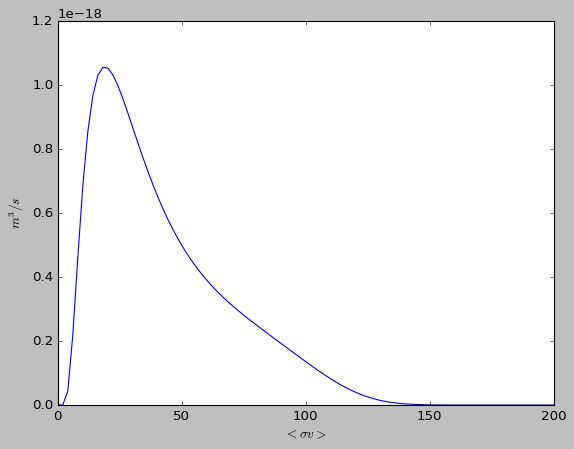

In [14]:
def sigma_v(T):
    l=[-21.38,-25.20,-7.1e-2,1.938e-4,4.925e-6,-3.98e-8]
    l2=list(range(-1,5))
    a=0
    for i ,j in zip(l,l2):
        print(i,j)
        a+=i*T**j
    return 1e-6 *np.exp(a)



x=np.linspace(0,200,100)
plt.ylabel("$m^3 / s $")
plt.xlabel("$<\sigma v>$")
plt.plot(x,sigma_v(x))

-21.38 -1
-25.2 0
-0.071 1
0.0001938 2
4.925e-06 3
-3.98e-08 4


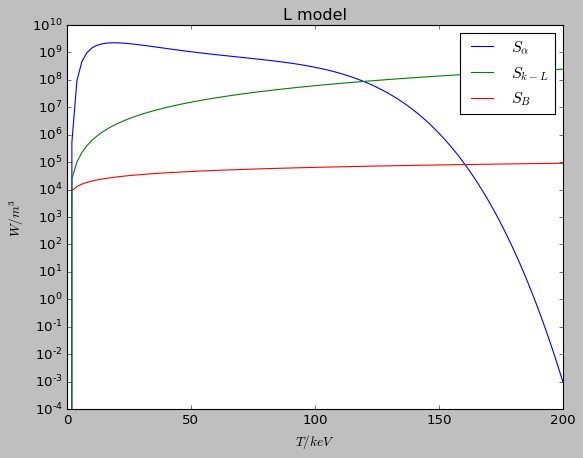

In [28]:
n=1.1e20
n0=1.1
R=6
a=2
epsilon=1/3
k=1.7
A=2.5
q=1.7
b0=6
def s_alpha(T):
    return 1/16*17.6*1.6e-13*(n**2)*sigma_v(T)

def tau_L(T):
    
    return 0.037* epsilon**0.3/q**1.7 *(a**1.7*k**1.7*b0**2.1*A) / n0**0.8 /T

def tau_H(T):

    return 0.28* epsilon**0.74/q**3 *(a**2.67*k**3.29*b0**3.48*A**0.61) / n0**0.91 /T**2.23

def s_k_L(T):
    return 3*n*T*1.6e-16/tau_L(T)

def s_k_H(T):
    return 3*n*T*1.6e-16/tau_H(T)

def s_b(T):
    return 0.052*(3.2e-21*n*T)**2/T**1.5*1e6

plt.yscale("log")
x=np.linspace(0,200,100)
plt.plot(x,s_alpha(x),label="$S_{\\alpha}$")
plt.plot(x,s_k_L(x),label="$S_{k-L}$")
plt.plot(x,s_b(x),label="$ S_B $")

# plt.plot(x,s_alpha(x)-s_k_L(x)-s_b(x))
plt.ylabel("$W/m^3 $")
plt.xlabel("$T/keV$")
plt.legend()
plt.title("L model")
plt.savefig("L.png",dpi=180)
# plt.plot(x,tau_L(x))


-21.38 -1
-25.2 0
-0.071 1
0.0001938 2
4.925e-06 3
-3.98e-08 4


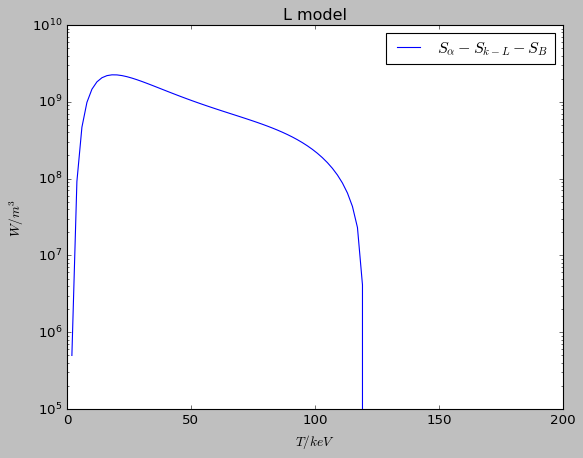

In [24]:
plt.yscale("log")
x=np.linspace(0,200,100)
plt.plot(x,s_alpha(x)-s_k_L(x)-s_b(x),label="$S_{\\alpha}-S_{k-L}-S_B$")
# plt.plot(x,s_k_L(x),label="$S_{k-L}$")
# plt.plot(x,s_b(x),label="$ S_B $")

# plt.plot(x,s_alpha(x)-s_k_L(x)-s_b(x))
plt.ylabel("$W/m^3 $")
plt.xlabel("$T/keV$")
plt.legend()
plt.title("L model")
plt.savefig("L_all.png",dpi=180)

-21.38 -1
-25.2 0
-0.071 1
0.0001938 2
4.925e-06 3
-3.98e-08 4


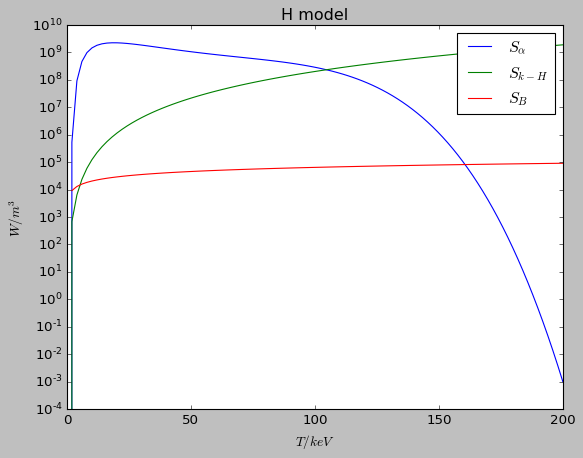

In [29]:
plt.yscale("log")
x=np.linspace(0,200,100)
plt.plot(x,s_alpha(x),label="$S_{\\alpha}$")
plt.plot(x,s_k_H(x),label="$S_{k-H}$")
plt.plot(x,s_b(x),label="$ S_B $")

# plt.plot(x,s_alpha(x)-s_k_L(x)-s_b(x))
plt.ylabel("$W/m^3 $")
plt.xlabel("$T/keV$")
plt.legend()
plt.title("H model")
plt.savefig("H.png",dpi=180)

-21.38 -1
-25.2 0
-0.071 1
0.0001938 2
4.925e-06 3
-3.98e-08 4


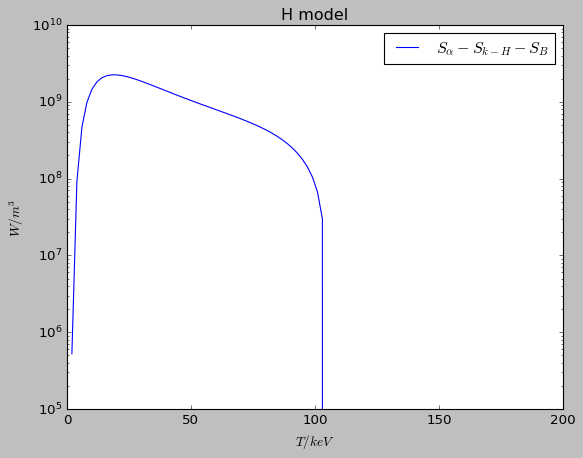

In [30]:
plt.yscale("log")
x=np.linspace(0,200,100)
plt.plot(x,s_alpha(x)-s_k_H(x)-s_b(x),label="$S_{\\alpha}-S_{k-H}-S_B$")
# plt.plot(x,s_k_L(x),label="$S_{k-L}$")
# plt.plot(x,s_b(x),label="$ S_B $")

# plt.plot(x,s_alpha(x)-s_k_L(x)-s_b(x))
plt.ylabel("$W/m^3 $")
plt.xlabel("$T/keV$")
plt.legend()
plt.title("H model")
plt.savefig("H_all.png",dpi=180)

In [8]:
int(5/2)

2

In [9]:
5/2

2.5

In [12]:
a=[2,-1,3]
a.sort()
a

[-1, 2, 3]

In [11]:
a

[1, 2, 3]